In [1]:
# importing libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# downloading stocks data from SimFin API between the start and end date
data = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-21", end="2021-05-20")
tech = data[["Adj Close","Volume"]]

[*********************100%***********************]  20 of 20 completed


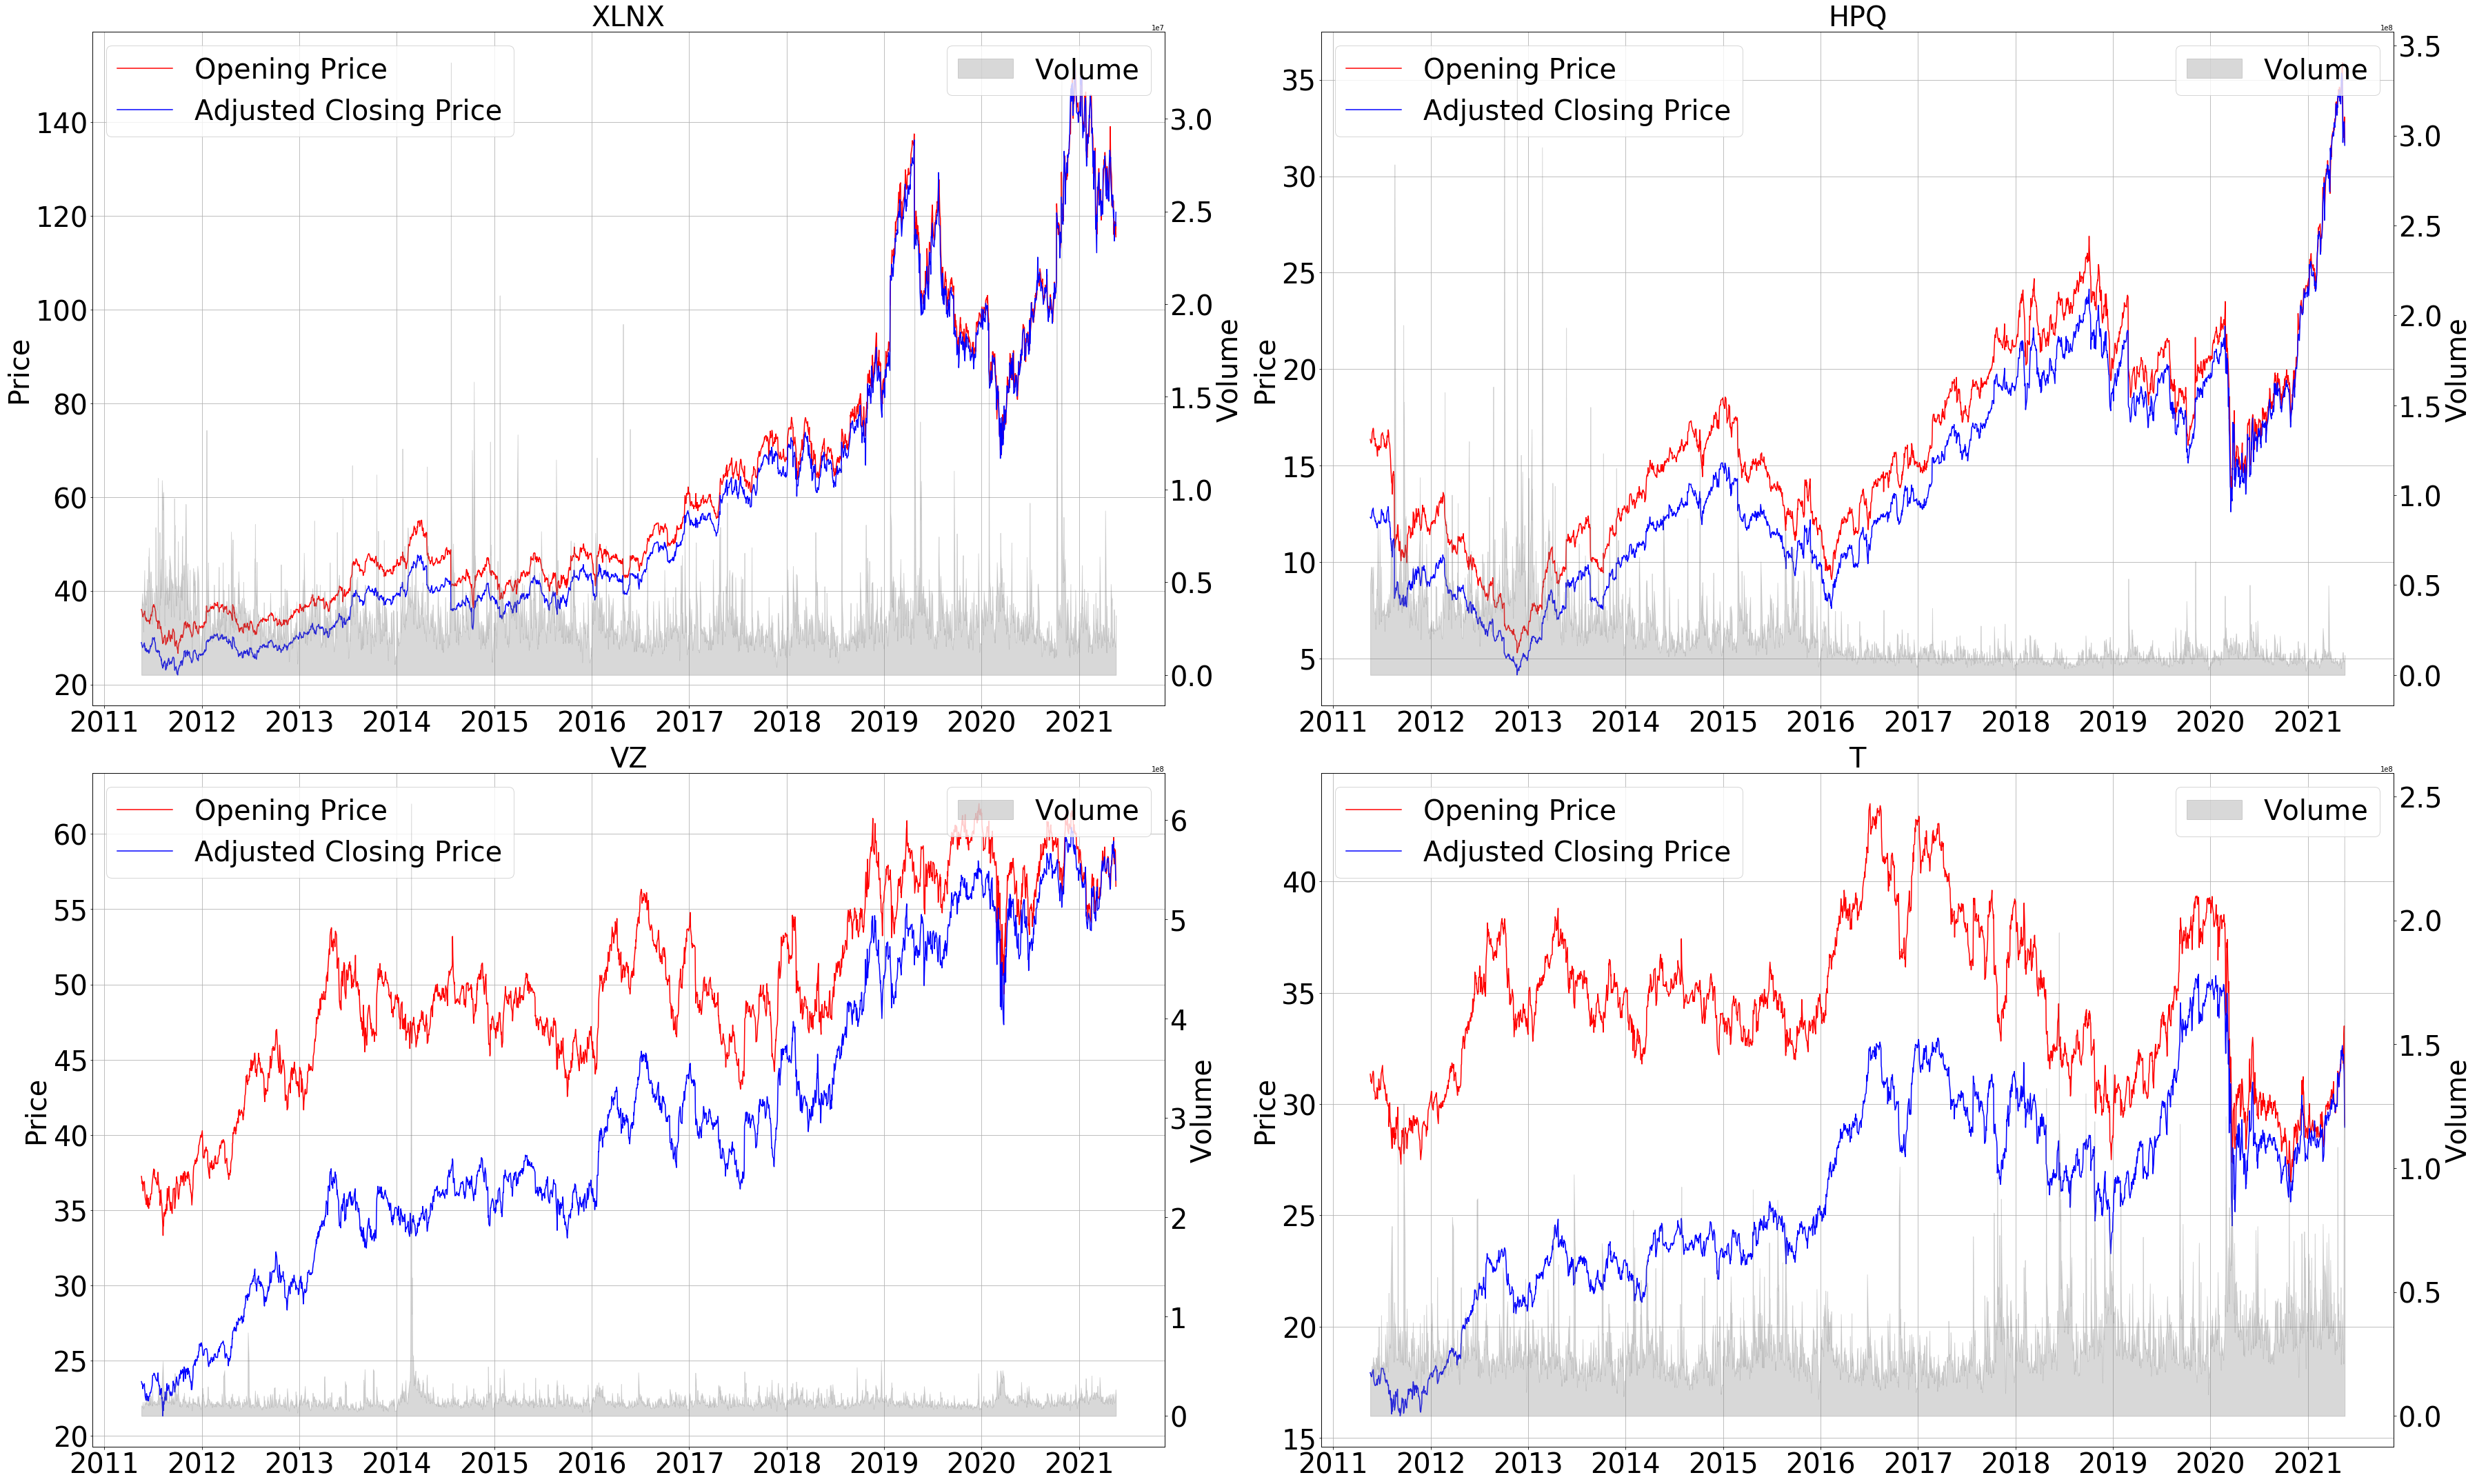

In [6]:
# plotting volume, and opening and adjusted closing price
index = [["GOOGL", "NVDA"], ["AMD", "V"], ["NFLX", "TXN"], ["AMAT", "AMZN"], ["INTC", "NVDA"], ["ADBE", "CSCO"], ["V", "IBM"], ["AAPL", "MSFT"], \
                ["XLNX", "HPQ"], ["VZ", "T"]]
fig,ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        # Plot Prices
        ax[i,j].plot(data['Open'].loc[:,index[i][j]], color='r')
        ax[i,j].plot(data['Adj Close'].loc[:,index[i][j]], color='b')
        ax[i,j].set_ylabel('Price', fontsize=40)
        ax[i,j].legend(['Opening Price','Adjusted Closing Price'], loc='upper left', fontsize=40)
        ax[i,j].grid()
        ax[i,j].set_title(index[i][j], fontsize=40)
        ax[i,j].tick_params(axis='both', labelsize=40)

        # Plot Volume
        tmpax = ax[i,j].twinx()
        tmpax.fill_between(data['Volume'].loc[:,index[i][j]].index, 0, data['Volume'].loc[:,index[i][j]], color='gray', alpha=0.3)
        tmpax.set_ylabel('Volume', fontsize=40)
        tmpax.legend(['Volume'], loc='upper right', fontsize=40)
        tmpax.tick_params(axis='both', labelsize=40)

fig.set_size_inches(50,30)
fig.tight_layout()

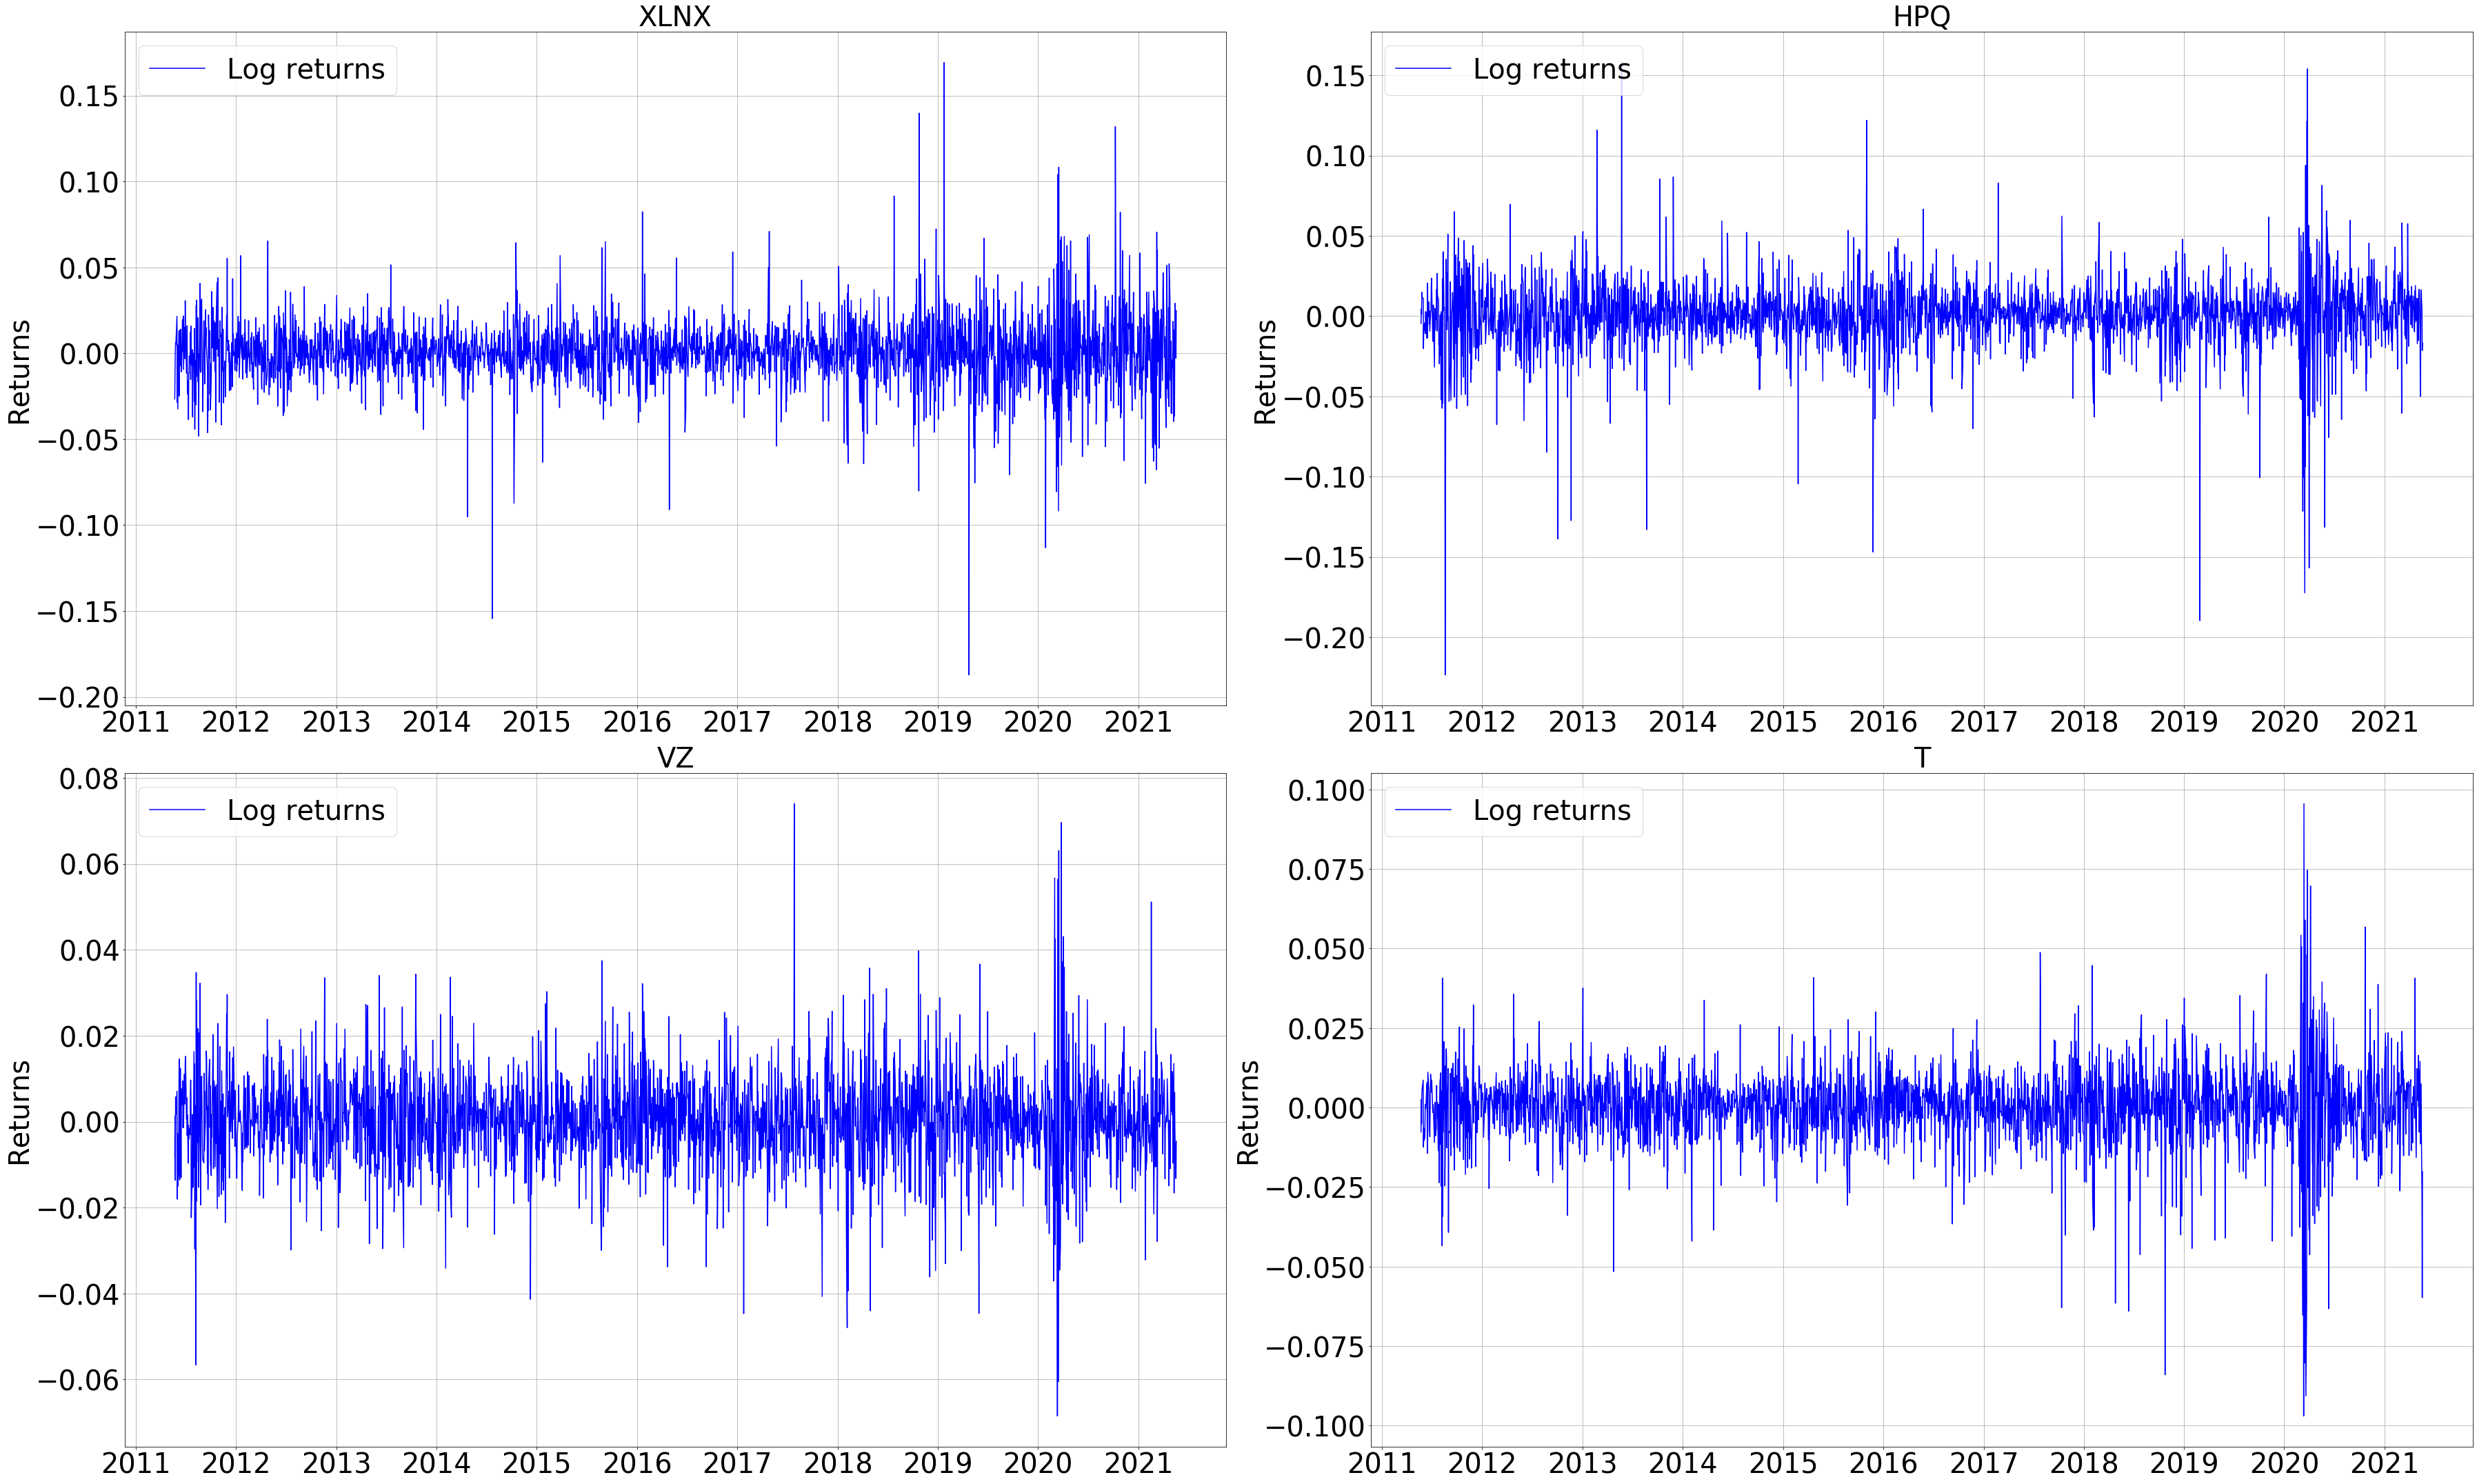

In [10]:
# plotting log returns
rs_tech = tech["Adj Close"].apply(np.log).diff(1) 
index = [["XLNX", "HPQ"], ["VZ", "T"]]
fig,ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        # Plot Prices
        ax[i,j].plot(rs_tech.loc[:,index[i][j]], color='b')
        ax[i,j].set_ylabel('Returns', fontsize=40)
        ax[i,j].legend(['Log returns'], loc='upper left', fontsize=40)
        ax[i,j].grid()
        ax[i,j].set_title(index[i][j], fontsize=40)
        ax[i,j].tick_params(axis='both', labelsize=40)
        
fig.set_size_inches(50,30)
fig.tight_layout()